In [1]:
import pandas as pd
from pandas.plotting import table
import numpy as np
import statsmodels.api as sm
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma
from scipy import stats
import pylab as pl
from pandas import *
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [2]:
!pip install Stargazer

In [3]:
from stargazer.stargazer import Stargazer

In [4]:
pd.set_option("display.float_format", "{:.2f}".format) #format wyświetlania dancych
df = pd.read_excel('model4.xlsx') #wgranie bazy danych

In [5]:
plt.rc('figure', figsize = (12,8)) #rozmiar wykresów

In [6]:
df.head(0) #wyświetlenie nagłówków

,country_name,gdim,gini,palma,pdi,ln_pkb_pc,pkb_pc,priv_pkb,bezrobocie,edu_pkb,edu_pkb_pc_podst,edu_pkb_pc_sr,edu_pkb_pc_wyz,trans_pkb


In [7]:
df.describe().transpose() #podstawowe charakterystyki

,count,mean,std,min,25%,50%,75%,max
gdim,112.00,58.48,16.47,16.23,47.21,60.85,72.28,93.17
gini,105.00,38.59,8.92,25.27,32.01,37.14,41.99,64.73
palma,101.00,5.39,3.81,1.55,2.85,4.44,6.35,19.07
pdi,74.00,4.91,3.65,1.76,2.78,3.81,5.82,20.65
ln_pkb_pc,110.00,7.97,1.58,4.97,6.78,7.83,9.01,10.87
pkb_pc,109.00,1.38,1.10,0.10,0.70,1.01,1.63,6.37
priv_pkb,90.00,52.71,45.09,2.79,18.13,36.07,77.63,184.15
bezrobocie,110.00,8.58,6.12,0.58,4.02,7.14,11.31,34.40
edu_pkb,101.00,4.44,1.69,1.61,3.27,4.32,5.52,11.22
edu_pkb_pc_podst,77.00,15.76,7.30,3.34,10.83,14.94,19.37,50.20


In [8]:
df.corr(method = 'pearson') #macierz korelacji

,gdim,gini,palma,pdi,ln_pkb_pc,pkb_pc,priv_pkb,bezrobocie,edu_pkb,edu_pkb_pc_podst,edu_pkb_pc_sr,edu_pkb_pc_wyz,trans_pkb
gdim,1.00,0.06,0.02,0.06,0.45,-0.04,0.46,0.07,0.24,0.02,-0.21,-0.29,0.15
gini,0.06,1.00,0.84,0.83,-0.32,-0.21,-0.29,0.11,-0.01,-0.32,-0.01,0.20,-0.36
palma,0.02,0.84,1.00,0.92,-0.32,-0.16,-0.39,0.11,0.05,-0.26,0.04,0.21,-0.38
pdi,0.06,0.83,0.92,1.00,-0.30,-0.16,-0.38,0.08,-0.09,-0.28,-0.14,0.18,-0.28
ln_pkb_pc,0.45,-0.32,-0.32,-0.30,1.00,-0.10,0.76,0.06,0.38,0.29,0.01,-0.38,0.55
pkb_pc,-0.04,-0.21,-0.16,-0.16,-0.10,1.00,-0.18,0.13,-0.16,0.06,-0.16,-0.15,0.03
priv_pkb,0.46,-0.29,-0.39,-0.38,0.76,-0.18,1.00,-0.11,0.25,0.20,0.02,-0.31,0.44
bezrobocie,0.07,0.11,0.11,0.08,0.06,0.13,-0.11,1.00,0.15,0.15,0.13,-0.03,0.08
edu_pkb,0.24,-0.01,0.05,-0.09,0.38,-0.16,0.25,0.15,1.00,0.45,0.60,0.12,0.11
edu_pkb_pc_podst,0.02,-0.32,-0.26,-0.28,0.29,0.06,0.20,0.15,0.45,1.00,0.33,-0.05,0.27


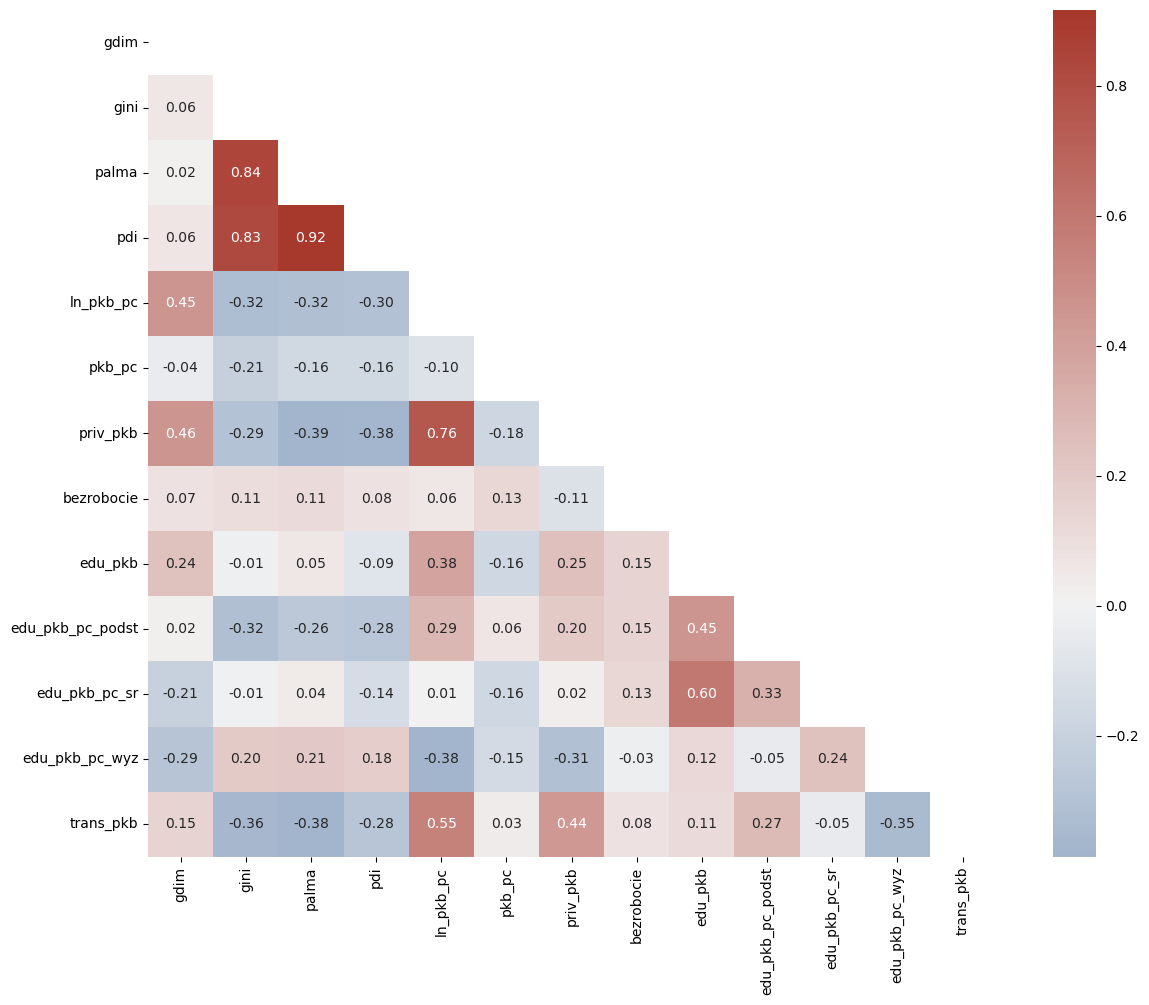

In [9]:
#heatmapka korelacji

# Calculate pairwise-correlation
matrix = df.corr(method = 'pearson')

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(15, 11))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

savefig("heatmap.jpg")
plt.show();

In [10]:
df['gdmi_2'].describe().transpose() #statystyki y

KeyError: 'gdmi_2'

In [ ]:
#histogramy y

hist(df['gdmi_1'], bins=15, edgecolor = 'black', color = 'mediumorchid')
pl.xlabel("GDMI")
pl.ylabel("Liczba krajów")
savefig('hist_price.jpg')
show()

In [ ]:
#model 1
m1b = smf.ols(formula = 'gdim ~ gini + palma + pkb_pc + ln_pkb_pc + priv_pkb + bezrobocie + edu_pkb + trans_pkb', data = df).fit()
m1b.summary()

In [11]:
#model 1
m1 = smf.ols(formula = 'gdim ~ gini + palma + pkb_pc + ln_pkb_pc + priv_pkb + bezrobocie + edu_pkb + trans_pkb', data = df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gdim   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     3.928
Date:                Fri, 02 Jun 2023   Prob (F-statistic):            0.00142
Time:                        15:54:02   Log-Likelihood:                -207.89
No. Observations:                  53   AIC:                             433.8
Df Residuals:                      44   BIC:                             451.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3508     24.128      1.092      0.281     -22.277      74.978
gini          -0.1743      0.506     -0.345      0.732      -1.193       0.845
palma          1.8851      1.130      1.668      0.103      -0.393       4.163
pkb_pc         3.0193      3.180      0.950      0.348      -3.389       9.427
ln_pkb_pc      2.4810      2.290      1.083      0.285      -2.135       7.097
priv_pkb       0.2292      0.080      2.869      0.006       0.068       0.390
bezrobocie     0.8401      0.527      1.594      0.118      -0.222       1.902
edu_pkb       -1.5719      1.304     -1.205      0.234      -4.200       1.056
trans_pkb     -0.1423      0.125     -1.141      0.260      -0.394       0.109
==============================================================================
Omnibus:                        0.496   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.387
Skew:                          -0.203   Prob(JB):                        0.824
Kurtosis:                       2.898   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
hip1 = '(gini_2 = 0),(edu_pkb = 0),(ln_pkb_pc=0)' #H0 o nieistotności

In [ ]:
m1.f_test(hip1) #F test

In [ ]:
#pvalue > 0.05 => nie ma podstaw do odrzucenia H0

In [12]:
#model 1
m2 = smf.ols(formula = 'gdim ~ palma + ln_pkb_pc + priv_pkb + bezrobocie + edu_pkb + trans_pkb', data = df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gdim   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     4.436
Date:                Fri, 02 Jun 2023   Prob (F-statistic):            0.00120
Time:                        15:54:06   Log-Likelihood:                -217.43
No. Observations:                  55   AIC:                             448.9
Df Residuals:                      48   BIC:                             462.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.7783     15.008      1.651      0.105      -5.398      54.954
palma          1.3928      0.643      2.166      0.035       0.100       2.686
ln_pkb_pc      3.1221      2.165      1.442      0.156      -1.231       7.475
priv_pkb       0.1560      0.065      2.409      0.020       0.026       0.286
bezrobocie     0.6571      0.477      1.379      0.174      -0.301       1.615
edu_pkb       -1.2147      1.235     -0.983      0.330      -3.698       1.269
trans_pkb     -0.1482      0.124     -1.200      0.236      -0.397       0.100
==============================================================================
Omnibus:                        0.869   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.583
Skew:                          -0.252   Prob(JB):                        0.747
Kurtosis:                       3.004   Cond. No.                         741.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
hip1 = '(gini = 0),(bezrobocie=0),(pkb_pc = 0),(edu_pkb = 0),(trans_pkb = 0)' #H0 o nieistotności odrzuconych zmiennych

In [ ]:
m1.f_test(hip1) #test

In [ ]:
#pvalue > 0.05 => nie ma podstaw do odrzucenia H0

In [13]:
#model 1
m3 = smf.ols(formula = 'gdim ~ palma + ln_pkb_pc + priv_pkb', data = df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gdim   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     12.74
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           7.86e-07
Time:                        15:54:09   Log-Likelihood:                -321.77
No. Observations:                  80   AIC:                             651.5
Df Residuals:                      76   BIC:                             661.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.0277     10.516      2.000      0.049       0.084      41.971
palma          1.4228      0.441      3.226      0.002       0.544       2.301
ln_pkb_pc      2.8798      1.409      2.044      0.044       0.074       5.686
priv_pkb       0.1323      0.052      2.556      0.013       0.029       0.235
==============================================================================
Omnibus:                        0.291   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.464
Skew:                          -0.095   Prob(JB):                        0.793
Kurtosis:                       2.679   Cond. No.                         497.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
stargazer1=Stargazer([m1, m2, m3])
with open('nazwapliku.html’, 'w') as f:
f.write(st.render_html())

SyntaxError: invalid syntax (1786580017.py, line 2)

In [18]:
#model 1
m4 = smf.ols(formula = 'gdim ~ gini + palma + pkb_pc + ln_pkb_pc + priv_pkb + bezrobocie + edu_pkb_pc_podst + edu_pkb_pc_sr + edu_pkb_pc_wyz + trans_pkb', data = df).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gdim   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     3.553
Date:                Fri, 02 Jun 2023   Prob (F-statistic):            0.00389
Time:                        15:58:27   Log-Likelihood:                -144.07
No. Observations:                  39   AIC:                             310.1
Df Residuals:                      28   BIC:                             328.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           64.5343     31.448      2.052      0.050       0.117     128.952
gini                -0.2857      0.617     -0.463      0.647      -1.550       0.979
palma                1.4348      1.209      1.186      0.245      -1.042       3.912
pkb_pc               0.1645      3.002      0.055      0.957      -5.984       6.313
ln_pkb_pc           -1.7597      2.958     -0.595      0.557      -7.819       4.300
priv_pkb             0.3122      0.084      3.699      0.001       0.139       0.485
bezrobocie           1.4879      0.638      2.333      0.027       0.181       2.794
edu_pkb_pc_podst    -0.5919      0.289     -2.048      0.050      -1.184       0.000
edu_pkb_pc_sr       -0.2619      0.397     -0.660      0.515      -1.075       0.551
edu_pkb_pc_wyz      -0.0051      0.029     -0.176      0.862      -0.065       0.054
trans_pkb            0.0316      0.154      0.206      0.838      -0.283       0.346
==============================================================================
Omnibus:                        5.016   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                2.806
Skew:                          -0.432   Prob(JB):                        0.246
Kurtosis:                       2.010   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#model 1
m5 = smf.ols(formula = 'gdim ~ gini + palma + pkb_pc + ln_pkb_pc + priv_pkb + bezrobocie + edu_pkb_pc_podst + edu_pkb_pc_sr', data = df).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gdim   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     6.292
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           1.59e-05
Time:                        15:58:31   Log-Likelihood:                -214.30
No. Observations:                  56   AIC:                             446.6
Df Residuals:                      47   BIC:                             464.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           20.2217     21.412      0.944      0.350     -22.855      63.298
gini                 0.1739      0.388      0.448      0.656      -0.607       0.955
palma                1.3843      0.791      1.751      0.087      -0.206       2.975
pkb_pc               1.3256      2.788      0.476      0.637      -4.282       6.934
ln_pkb_pc            2.3656      1.728      1.369      0.177      -1.110       5.841
priv_pkb             0.1957      0.061      3.185      0.003       0.072       0.319
bezrobocie           0.2861      0.383      0.748      0.458      -0.483       1.056
edu_pkb_pc_podst    -0.1430      0.247     -0.580      0.565      -0.639       0.353
edu_pkb_pc_sr       -0.3270      0.181     -1.806      0.077      -0.691       0.037
==============================================================================
Omnibus:                        5.456   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.170
Skew:                          -0.377   Prob(JB):                        0.205
Kurtosis:                       2.111   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#model 1
m6 = smf.ols(formula = 'gdim ~ palma + ln_pkb_pc + priv_pkb + bezrobocie + edu_pkb_pc_podst + edu_pkb_pc_sr', data = df).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gdim   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     8.413
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           2.53e-06
Time:                        15:58:31   Log-Likelihood:                -218.51
No. Observations:                  57   AIC:                             451.0
Df Residuals:                      50   BIC:                             465.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           32.5724     11.007      2.959      0.005      10.463      54.682
palma                1.5896      0.443      3.587      0.001       0.699       2.480
ln_pkb_pc            1.8929      1.476      1.282      0.206      -1.073       4.858
priv_pkb             0.1983      0.056      3.572      0.001       0.087       0.310
bezrobocie           0.3092      0.339      0.912      0.366      -0.372       0.990
edu_pkb_pc_podst    -0.1808      0.239     -0.756      0.453      -0.661       0.300
edu_pkb_pc_sr       -0.3655      0.174     -2.096      0.041      -0.716      -0.015
==============================================================================
Omnibus:                        5.046   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                3.225
Skew:                          -0.402   Prob(JB):                        0.199
Kurtosis:                       2.157   Cond. No.                         543.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#model 1
m7 = smf.ols(formula = 'gdim ~ palma + ln_pkb_pc + priv_pkb +edu_pkb_pc_sr', data = df).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gdim   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     12.53
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           3.03e-07
Time:                        15:58:32   Log-Likelihood:                -223.19
No. Observations:                  58   AIC:                             456.4
Df Residuals:                      53   BIC:                             466.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        30.9495     10.877      2.845      0.006       9.134      52.765
palma             1.7387      0.411      4.229      0.000       0.914       2.563
ln_pkb_pc         2.1071      1.395      1.511      0.137      -0.691       4.905
priv_pkb          0.1882      0.053      3.528      0.001       0.081       0.295
edu_pkb_pc_sr    -0.3953      0.159     -2.489      0.016      -0.714      -0.077
==============================================================================
Omnibus:                        3.689   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.966
Skew:                          -0.432   Prob(JB):                        0.227
Kurtosis:                       2.306   Cond. No.                         533.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
Stargazer([m4, m5, m6, m7])

In [ ]:
hip2 = '(gini = 0),(bezrobocie=0),(pkb_pc = 0),(edu_pkb_pc_wyz = 0),(trans_pkb = 0),(edu_pkb_pc_podst=0)' #H0 o nieistotności

In [25]:
m4.f_test(hip2) #F test

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.2617536170748256, p=0.30637543576547416, df_denom=28, df_num=6>

In [ ]:
#pvalue > 0.05 => nie ma podstaw do odrzucenia H0

In [50]:
#Stargazer pokazujący proces usuwania zmiennych niestotnych w modelu
Stargazer([m1, m2, m3, m4, m5, m6])

In [34]:
#współczynnik VIF na współliniowość

def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [35]:
#zmienne do wsp. VIF (te, które zostały w modelu jeszcze)
zmienne = ['palma','priv_pkb','ln_pkb_pc','edu_pkb_pc_sr',]

In [36]:
'palma','ln_pkb_pc','priv_pkb','nier_edu','bezrobocie','edu_pkb_pc_sr','edu_pkb_pc_wyz'

('palma',
 'ln_pkb_pc',
 'priv_pkb',
 'nier_edu',
 'bezrobocie',
 'edu_pkb_pc_sr',
 'edu_pkb_pc_wyz')

In [37]:
get_vif(exogs = zmienne, data = df )

,VIF,Tolerance
palma,1.24,0.81
priv_pkb,2.38,0.42
ln_pkb_pc,2.25,0.44
edu_pkb_pc_sr,1.00,1.00


In [ ]:
#wysoka korelacja house_size, rooms_number i ich korelacji
#wysoka korelacja building_age i building_age_2
#nie odrzucam, ponieważ wszystkie zmienne są celowo skorelowane z sobą
#a ewentualne usuniecie spowoduje obciążenie estymatora drugiej zmiennej

In [39]:
#dźwignia
h_lev = (2*len(m7.params))/m7.nobs
round(h_lev, 2)

0.17

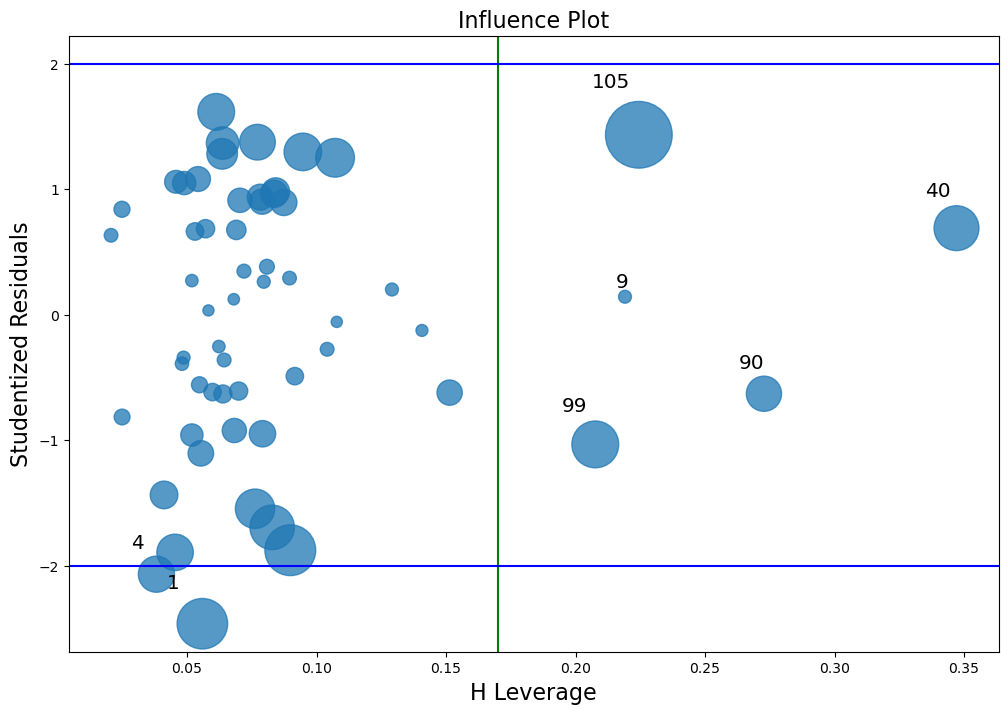

In [41]:
#wykres obserwacji nietypowych ze względu na dźwignię, reszty i odl. Cooka

sm.graphics.influence_plot(m7, criterion = 'Cooks')
axvline(x = round(h_lev, 2), color = 'g')
axhline(y=2, color = 'b')
axhline(y=-2, color = 'b')
savefig('obs_nietypowe.jpg')
savefig("cook.jpg")
show()

In [ ]:
#kilka zmiennych wyszło odstających ale po indywidualnej analizie tych danych można wywnioskować,
#że mieszkania są prawdopodobne i nie posiadają informacji błędnych więc nie zostały usunięte

In [26]:
#test RESET na poprawną formę funkcyjną
sms.linear_reset(m7, power = 3, test_type = 'fitted') 

D:\python program\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=4.629990692377991, p-value=0.09876664364235505, df_denom=2>

In [ ]:
#pvalue > 0.05 => nie ma podstaw od odrzucenia H0 => mamy poprawną formę funkcyjną

In [ ]:
#test jarque-bera analizuje z wydruku OLS, pvalue < 0.05 => odrzucam hipoteze 0
#reszty nie mają normalnego rozkładu, lecz zgodnie z CTG przy próbie badawczej
# > 100 nie ma to większego znaczenia

In [28]:
#oznaczniki
nam1 = ['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

In [29]:
#TEST BREUSCHA-PAGANA na homoskedastyczność
test1 = sms.het_breuschpagan(m7.resid, m7.model.exog)
lzip(nam1, test1)

[('lagrange multiplier statistic', 0.42271724798754406),
 ('p-value', 0.9805750785882749),
 ('f-value', 0.09727801084255285),
 ('f p-value', 0.9828896210113099)]

In [ ]:
#pvalue < 0.05 => odrzucamy H0 => mamy heteroskedastyczność

In [30]:
#TEST WHITE'A
test2 = sms.het_white(m7.resid, m7.model.exog)
lzip(nam1, test2)

[('lagrange multiplier statistic', 11.639627332079057),
 ('p-value', 0.6352183982645067),
 ('f-value', 0.7711388388658476),
 ('f p-value', 0.6927709041930092)]

In [ ]:
#pvalue < 0.05 => odrzucamy H0 => dodatkowe potwierdzenie, że mamy heteroskedastyczność

In [41]:
#z uwagi na heteroskedastyczność stosujemy macierz odporną White'a
m7 = smf.ols(formula = 'ln_price ~ house_size + building_age + building_age_2 + rooms_number + market_type + district + basement + elevator + ln_metro_distance + house_size:rooms_number', data = df).fit(cov_type = 'HC0')
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          8.54e-207
Time:                        22:29:46   Log-Likelihood:                 156.65
No. Observations:                 629   AIC:                            -291.3
Df Residuals:                     618   BIC:                            -242.4
Df Model:                          10                                         
Covariance Type:                  HC0                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  12.7895      0.084    151.601      0.000      12.624      12.955
house_size                  0.0209      0.001     15.026      0.000       0.018       0.024
building_age               -0.0073      0.001     -7.679      0.000      -0.009      -0.005
building_age_2            6.88e-05   1.04e-05      6.622      0.000    4.84e-05    8.92e-05
rooms_number                0.1136      0.018      6.193      0.000       0.078       0.150
market_type                -0.0862      0.035     -2.463      0.014      -0.155      -0.018
district                    0.1963      0.026      7.448      0.000       0.145       0.248
basement                    0.1508      0.034      4.439      0.000       0.084       0.217
elevator                    0.0731      0.015      4.850      0.000       0.044       0.103
ln_metro_distance          -0.0680      0.008     -8.271      0.000      -0.084      -0.052
house_size:rooms_number    -0.0020      0.000     -7.500      0.000      -0.002      -0.001
==============================================================================
Omnibus:                       51.973   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.875
Skew:                           0.591   Prob(JB):                     2.74e-18
Kurtosis:                       4.300   Cond. No.                     3.85e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 3.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#Stargazer porównujący model z i bez macierzy odpornej White'a
Stargazer([m6, m7])

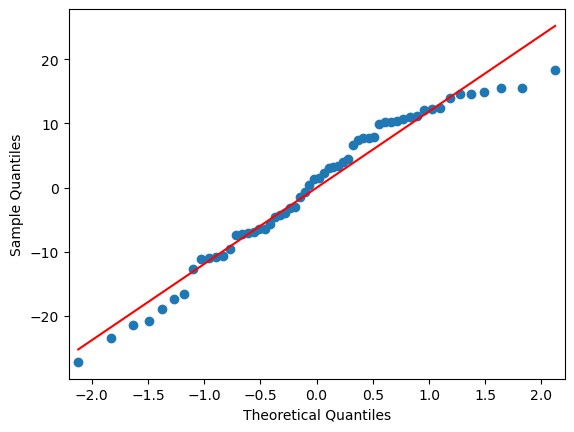

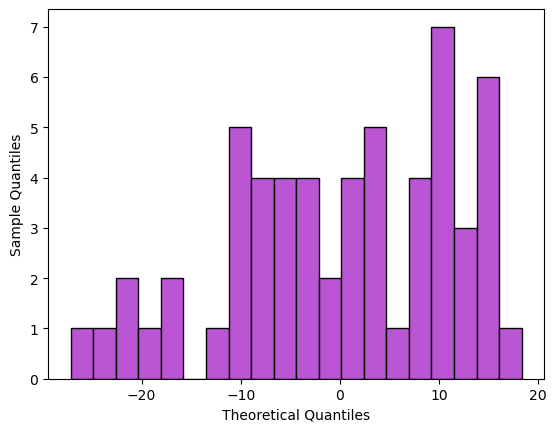

In [9]:
#wykres kwantylowy rozkładu reszt
sm.qqplot(m6.resid, line = 'r')
savefig('wykres_kwantylowy_reszt.jpg')
show()
#histogram rozkładu reszt
hist(m6.resid, bins = 20, color = 'mediumorchid', edgecolor = 'black')
xlabel('Theoretical Quantiles')
ylabel('Sample Quantiles')
savefig('histogram_reszt.jpg')
show()

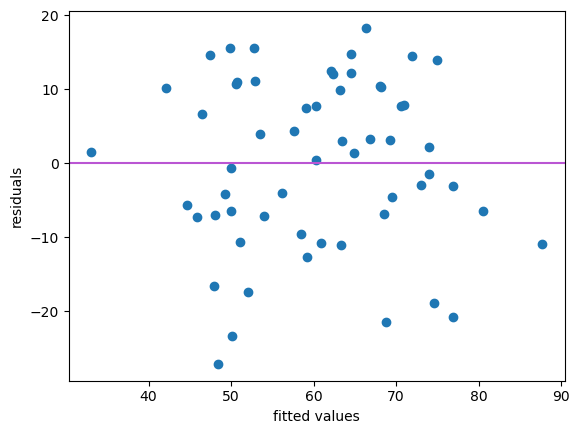

In [11]:
#wykres rozrzutu pomiędzy resztami a wartościami dopasowanymi w modelu
scatter(m6.fittedvalues, m6.resid)
axhline(y = 0, color = 'mediumorchid')
xlabel('fitted values')
ylabel('residuals')
savefig('reszty_fittedvalues.jpg')
show()

In [45]:
#wyniki estymacji
#wzrosto o jedną jednostkę miary
#lub występowanie zmiennej w obserwacji w przypadku zmiennych binarnych

In [ ]:
#metraż
#(e**(0.021-0.002*rooms_number)-1)*100%

In [58]:
#liczba lat budynku
#(e**(-0.007+2*0.00007*building_age)-1)*100%


In [ ]:
#liczba pokoi
#(e**(0.114-0.002*house_size)-1)*100%

In [49]:
#typ rynku
(e**(-0.086) -1)*100

-8.240576877984896

In [50]:
#dzielnica
(e**(0.196) -1)*100

21.652690533431617

In [51]:
#piwnica
(e**(0.151) -1)*100

16.299665808182027

In [52]:
#winda
(e**(0.073) -1)*100

7.573053691470344

In [53]:
#odległość od metra
-0.068 * 100

-6.800000000000001